# Water Quality Classification & Prediction System

## Telangana Control Board - Water Quality Analysis

### Project Objectives:
1. Classify water quality into: **Safe/Potable**, **Polluted**, **Highly Polluted**
2. Calculate and predict **Water Quality Index (WQI)**
3. Train multiple ML models: **Random Forest**, **XGBoost**, **Neural Networks**
4. Perform **Feature Importance Analysis**
5. Generate comprehensive visualizations and insights

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ML Models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, 
    mean_squared_error, r2_score, mean_absolute_error
)
from sklearn.impute import SimpleImputer
import xgboost as xgb

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)

print('✅ All libraries imported successfully!')
print(f'TensorFlow: {tf.__version__}, Pandas: {pd.__version__}')

2025-12-03 14:11:23.938098: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


✅ All libraries imported successfully!
TensorFlow: 2.20.0, Pandas: 2.3.3


## 2. Load and Explore Data

In [2]:
# Load dataset
df = pd.read_csv('Water_Quality_Data_06_2025.csv')

print('=' * 80)
print('DATASET OVERVIEW')
print('=' * 80)
print(f'\n📊 Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns')
print(f'📍 Monitoring Stations: {df["Station code"].nunique()}')
print(f'🌊 Water Bodies: {df["water_bodies"].nunique()}')

df.head()

DATASET OVERVIEW

📊 Dataset Shape: 213 rows × 43 columns
📍 Monitoring Stations: 213
🌊 Water Bodies: 7


,Station code,water_bodies,Station name,Remarks,DO (mg/L),pH,Conductivity (mS/cm),BOD (mg/L),Nitrate,Nitrite-N (mg/L),Fecal Coliform (MPN/100ml),Total Coliform (MPN/100ml),Faecal streptococci,Saprobity index,Diversity index,P/R Ratio,Turbidity (NTU),Phen-Alk. (mg/L),Total Alk. (mg/L),Chloride (mg/L),COD (mg/L),TKN (mg/L),Ammonia,Free Ammonia (mg/L),Hardness (mg/L),Calcium (mg/L),Calcium Carbonate as CaCO3,Magnesium (mg/L),Magnesium Carbonate as CaCO3,Sulphate (mg/L),Sodium (mg/L),TDS (mg/L),TFS (mg/L),TSS (mg/L),Total Phosphate (mg/L),Ortho Phosphate (mg/L),Boron (mg/L),Potassium (mg/L),Fluoride (mg/L),sodium %,SAR,Unnamed: 41,Unnamed: 42
0,2360,River Godavari,River Godavari at Basara,NaN,6.7,8.13,913.0,3.2,24.00,0.04,3.6,25.0,2,NaN,NaN,NaN,3.1,10.0,180.0,82.0,20.0,4,0.4,BDL,192.3,44.0,110.0,20.00,82.3,52.0,62.0,465.00,325.50,8.0,NaN,0.05,0.5,5.0,0.31,40.53,1.95,NaN,NaN
1,5105,River Godavari,"River Godavari Pushkar Ghat, Mancherial",NaN,7,7.82,749.0,3.1,18.00,0.04,2,21.0,Less than 1.8,NaN,NaN,NaN,3.2,12.0,200.0,94.0,20.0,4,0.4,BDL,210.0,44.0,110.0,24.00,100.0,30.0,60.0,419.44,293.61,7.0,NaN,0.05,0.5,4.0,0.28,37.99,1.81,NaN,NaN
2,4255,River Godavari,Ali sagar Reservoir,NaN,6.5,8.09,636.0,3.3,17.00,0.03,3.7,22.0,2,NaN,NaN,NaN,2.9,10.0,144.0,64.0,24.0,5,0.4,BDL,182.3,40.0,100.0,20.00,82.3,32.0,35.0,356.16,249.31,6.0,NaN,0.05,0.5,3.0,0.20,29.11,1.13,NaN,NaN
3,4227,River Godavari,"Pochara Water Falls, Adilabad",NaN,6.9,8.11,724.0,3.1,24.00,0.11,5.6,26.0,3.7,NaN,NaN,NaN,2.7,24.0,216.0,50.0,24.0,4,0.4,BDL,250.0,60.0,150.0,24.00,100.0,25.0,20.0,405.44,283.81,7.0,NaN,0.05,0.5,3.0,0.32,14.74,0.55,NaN,NaN
4,2361,River Godavari,"River Godavari at mancherial, Near Rail Way Br...",NaN,6.1,7.60,580.0,1.2,0.62,NaN,Less than 1.8,32.0,Less than 1.8,NaN,NaN,NaN,6.0,5.0,92.0,78.0,20.0,1.5,0.4,NaN,120.0,26.0,65.0,13.37,55.0,56.0,NaN,340.00,210.00,10.0,0.2,0.05,0.5,NaN,0.67,NaN,NaN,NaN,NaN


In [3]:
# Missing values analysis
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_%': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Missing_%', ascending=False)

print('\nMissing Values Analysis:')
print(missing_data[missing_data['Missing_Count'] > 0].head(10))


Missing Values Analysis:
                                    Column  Missing_Count  Missing_%
P/R Ratio                        P/R Ratio            213     100.00
Saprobity index            Saprobity index            213     100.00
Diversity index            Diversity index            213     100.00
Unnamed: 42                    Unnamed: 42            212      99.53
Unnamed: 41                    Unnamed: 41            212      99.53
Nitrite-N (mg/L)          Nitrite-N (mg/L)            168      78.87
Sodium (mg/L)                Sodium (mg/L)            166      77.93
Free Ammonia  (mg/L)  Free Ammonia  (mg/L)            166      77.93
Potassium (mg/L)          Potassium (mg/L)            166      77.93
SAR                                    SAR            166      77.93


In [4]:
# Water bodies distribution
print('Water Bodies Distribution:')
print(df['water_bodies'].value_counts())

fig = px.pie(df, names='water_bodies', title='Distribution of Water Bodies',
             hole=0.4, color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()

Water Bodies Distribution:
water_bodies
Lakes  & Tanks           156
River Godavari            18
River Krishna             12
River Musi                12
River Manjeera             7
River Maneru / Manair      5
River Kinneresani          3
Name: count, dtype: int64


## 3. Data Cleaning and Preprocessing

In [5]:
# Create clean copy
df_clean = df.copy()

# Remove rows with remarks indicating no data
remarks_to_remove = ['dried up', 'lake emptied', 'under renovation', 'not collected', 
                     'No Access', 'lake covered', 'Lake covered']
initial_count = len(df_clean)
for remark in remarks_to_remove:
    df_clean = df_clean[~df_clean['Remarks'].astype(str).str.contains(remark, case=False, na=False)]

print(f'🧹 Removed {initial_count - len(df_clean)} rows with invalid remarks')
print(f'📊 Remaining samples: {len(df_clean)}')

# Select key parameters
key_parameters = [
    'DO (mg/L)', 'pH', 'Conductivity (mS/cm)', 'BOD (mg/L)', 'COD (mg/L)',
    'Nitrate', 'Nitrite-N (mg/L)', 'Fecal Coliform (MPN/100ml)', 
    'Total Coliform (MPN/100ml)', 'Turbidity (NTU)', 'Total Alk. (mg/L)',
    'Chloride (mg/L)', 'TDS (mg/L)', 'TSS (mg/L)', 'Total Phosphate (mg/L)',
    'Ammonia', 'Hardness (mg/L)', 'Fluoride (mg/L)'
]

metadata_cols = ['Station code', 'water_bodies', 'Station name']
cols_to_keep = metadata_cols + [col for col in key_parameters if col in df_clean.columns]
df_clean = df_clean[cols_to_keep]

🧹 Removed 40 rows with invalid remarks
📊 Remaining samples: 173


In [6]:
# Handle non-numeric values
def clean_numeric_column(series):
    series = series.replace(['BDL', 'Less than 1.8', 'NIL', ''], np.nan)
    return pd.to_numeric(series, errors='coerce')

# Apply to all parameter columns
for col in key_parameters:
    if col in df_clean.columns:
        df_clean[col] = clean_numeric_column(df_clean[col])

# Remove rows with too many missing values
threshold = len(key_parameters) * 0.5
df_clean = df_clean.dropna(thresh=len(metadata_cols) + threshold)

print(f'✅ Data cleaned. Final shape: {df_clean.shape}')
df_clean.describe().T

✅ Data cleaned. Final shape: (165, 21)


,count,mean,std,min,25%,50%,75%,max
Station code,165.0,3863.993939,1269.529318,13.00,3068.000,4252.00,5030.00,5497.00
DO (mg/L),164.0,3.392012,2.724292,0.30,0.300,3.80,6.10,7.40
pH,165.0,7.450909,0.481247,6.32,7.100,7.53,7.82,8.40
Conductivity (mS/cm),165.0,1268.472727,1156.049384,173.00,781.000,1145.00,1396.00,12300.00
BOD (mg/L),165.0,7.160000,21.284710,1.00,3.200,4.50,8.00,274.00
COD (mg/L),165.0,83.200000,150.004073,12.00,30.000,60.00,92.00,1824.00
Nitrate,165.0,15.094970,21.429047,0.33,2.150,5.33,20.00,144.00
Nitrite-N (mg/L),45.0,0.122000,0.099558,0.03,0.050,0.10,0.16,0.50
Fecal Coliform (MPN/100ml),136.0,21.580882,16.969094,2.00,6.000,17.00,39.00,70.00
Total Coliform (MPN/100ml),165.0,239.175758,208.190548,20.00,40.000,210.00,430.00,920.00


## 4. Calculate Water Quality Index (WQI)

WQI is calculated using WHO/BIS drinking water standards.

In [7]:
# WHO/BIS Standards
standards = {
    'pH': {'ideal': 7.0, 'min': 6.5, 'max': 8.5, 'weight': 4},
    'DO (mg/L)': {'ideal': 6.0, 'min': 5.0, 'max': 14.0, 'weight': 5},
    'BOD (mg/L)': {'ideal': 0, 'min': 0, 'max': 3.0, 'weight': 5},
    'COD (mg/L)': {'ideal': 0, 'min': 0, 'max': 10.0, 'weight': 4},
    'Nitrate': {'ideal': 0, 'min': 0, 'max': 45.0, 'weight': 5},
    'Total Coliform (MPN/100ml)': {'ideal': 0, 'min': 0, 'max': 50, 'weight': 5},
    'Fecal Coliform (MPN/100ml)': {'ideal': 0, 'min': 0, 'max': 10, 'weight': 5},
    'TDS (mg/L)': {'ideal': 300, 'min': 0, 'max': 500, 'weight': 4},
    'Turbidity (NTU)': {'ideal': 1, 'min': 0, 'max': 5, 'weight': 3},
    'Chloride (mg/L)': {'ideal': 200, 'min': 0, 'max': 250, 'weight': 3},
    'Hardness (mg/L)': {'ideal': 100, 'min': 0, 'max': 300, 'weight': 2},
    'Fluoride (mg/L)': {'ideal': 1.0, 'min': 0.5, 'max': 1.5, 'weight': 4}
}

print('Water Quality Standards (WHO/BIS)')
pd.DataFrame(standards).T

Water Quality Standards (WHO/BIS)


,ideal,min,max,weight
pH,7.0,6.5,8.5,4.0
DO (mg/L),6.0,5.0,14.0,5.0
BOD (mg/L),0.0,0.0,3.0,5.0
COD (mg/L),0.0,0.0,10.0,4.0
Nitrate,0.0,0.0,45.0,5.0
Total Coliform (MPN/100ml),0.0,0.0,50.0,5.0
Fecal Coliform (MPN/100ml),0.0,0.0,10.0,5.0
TDS (mg/L),300.0,0.0,500.0,4.0
Turbidity (NTU),1.0,0.0,5.0,3.0
Chloride (mg/L),200.0,0.0,250.0,3.0


In [8]:
def calculate_qi(value, param_name, standards):
    '''Calculate Quality Index for a single parameter'''
    if pd.isna(value) or param_name not in standards:
        return np.nan
    std = standards[param_name]
    
    if param_name == 'pH':
        if std['min'] <= value <= std['max']:
            qi = 100 - abs(value - std['ideal']) * 10
        else:
            qi = max(0, 100 - abs(value - std['ideal']) * 20)
    elif std['ideal'] == 0:
        if value <= std['max']:
            qi = 100 - (value / std['max']) * 100
        else:
            qi = max(0, 100 - (value / std['max']) * 150)
    else:
        if value <= std['max']:
            qi = 100 - abs(value - std['ideal']) / std['max'] * 100
        else:
            qi = max(0, 100 - (value - std['max']) / std['max'] * 100)
    return max(0, min(100, qi))

def calculate_wqi(row, standards):
    '''Calculate Water Quality Index using weighted average'''
    qi_values, weights = [], []
    for param, std_values in standards.items():
        if param in row.index:
            qi = calculate_qi(row[param], param, standards)
            if not pd.isna(qi):
                qi_values.append(qi)
                weights.append(std_values['weight'])
    if len(qi_values) == 0:
        return np.nan
    return sum(q * w for q, w in zip(qi_values, weights)) / sum(weights)

# Calculate WQI
print('🔄 Calculating Water Quality Index...')
df_clean['WQI'] = df_clean.apply(lambda row: calculate_wqi(row, standards), axis=1)
print(f'✅ WQI calculated! Mean: {df_clean["WQI"].mean():.2f}, Median: {df_clean["WQI"].median():.2f}')

🔄 Calculating Water Quality Index...
✅ WQI calculated! Mean: 46.20, Median: 43.53


## 5. Create Classification Labels

- **Safe/Potable**: WQI >= 70
- **Polluted**: 40 <= WQI < 70
- **Highly Polluted**: WQI < 40

In [9]:
def classify_water_quality(wqi):
    if pd.isna(wqi):
        return np.nan
    elif wqi >= 70:
        return 'Safe/Potable'
    elif wqi >= 40:
        return 'Polluted'
    else:
        return 'Highly Polluted'

df_clean['Water_Quality_Class'] = df_clean['WQI'].apply(classify_water_quality)
df_clean = df_clean.dropna(subset=['WQI', 'Water_Quality_Class'])

print('Water Quality Classification Distribution:')
print(df_clean['Water_Quality_Class'].value_counts())
print(f'\nPercentage:')
print(df_clean['Water_Quality_Class'].value_counts(normalize=True) * 100)

Water Quality Classification Distribution:
Water_Quality_Class
Polluted           118
Highly Polluted     44
Safe/Potable         3
Name: count, dtype: int64

Percentage:
Water_Quality_Class
Polluted           71.515152
Highly Polluted    26.666667
Safe/Potable        1.818182
Name: proportion, dtype: float64


In [10]:
# Visualize classification
colors = {'Safe/Potable': '#2ecc71', 'Polluted': '#f39c12', 'Highly Polluted': '#e74c3c'}
class_counts = df_clean['Water_Quality_Class'].value_counts()

fig = go.Figure(data=[go.Pie(
    labels=class_counts.index,
    values=class_counts.values,
    marker_colors=[colors[c] for c in class_counts.index],
    hole=0.3
)])
fig.update_layout(title='Water Quality Classification Distribution', height=500)
fig.show()

## 6. Exploratory Data Analysis

In [11]:
# WQI distribution
fig = px.histogram(df_clean, x='WQI', nbins=50, 
                   title='Water Quality Index Distribution',
                   color_discrete_sequence=['#3498db'])
fig.add_vline(x=70, line_dash='dash', line_color='green', annotation_text='Safe (70)')
fig.add_vline(x=40, line_dash='dash', line_color='orange', annotation_text='Polluted (40)')
fig.show()

In [12]:
# WQI by water body
wqi_by_body = df_clean.groupby('water_bodies')['WQI'].agg(['mean', 'std', 'count']).round(2)
wqi_by_body = wqi_by_body.sort_values('mean', ascending=False)

print('Average WQI by Water Body:')
print(wqi_by_body)

fig = go.Figure(data=[go.Bar(
    x=wqi_by_body.index,
    y=wqi_by_body['mean'],
    error_y=dict(type='data', array=wqi_by_body['std'])
)])
fig.add_hline(y=70, line_dash='dash', line_color='green')
fig.add_hline(y=40, line_dash='dash', line_color='orange')
fig.update_layout(title='Average WQI by Water Body', height=500)
fig.show()

Average WQI by Water Body:
                        mean   std  count
water_bodies                             
River Kinneresani      64.73  2.84      3
River Godavari         61.61  7.43     17
River Maneru / Manair  59.47  2.93      2
River Krishna          53.32  5.93     12
River Manjeera         47.27  6.22      7
Lakes  & Tanks         42.84  8.74    113
River Musi             40.99  3.28     11


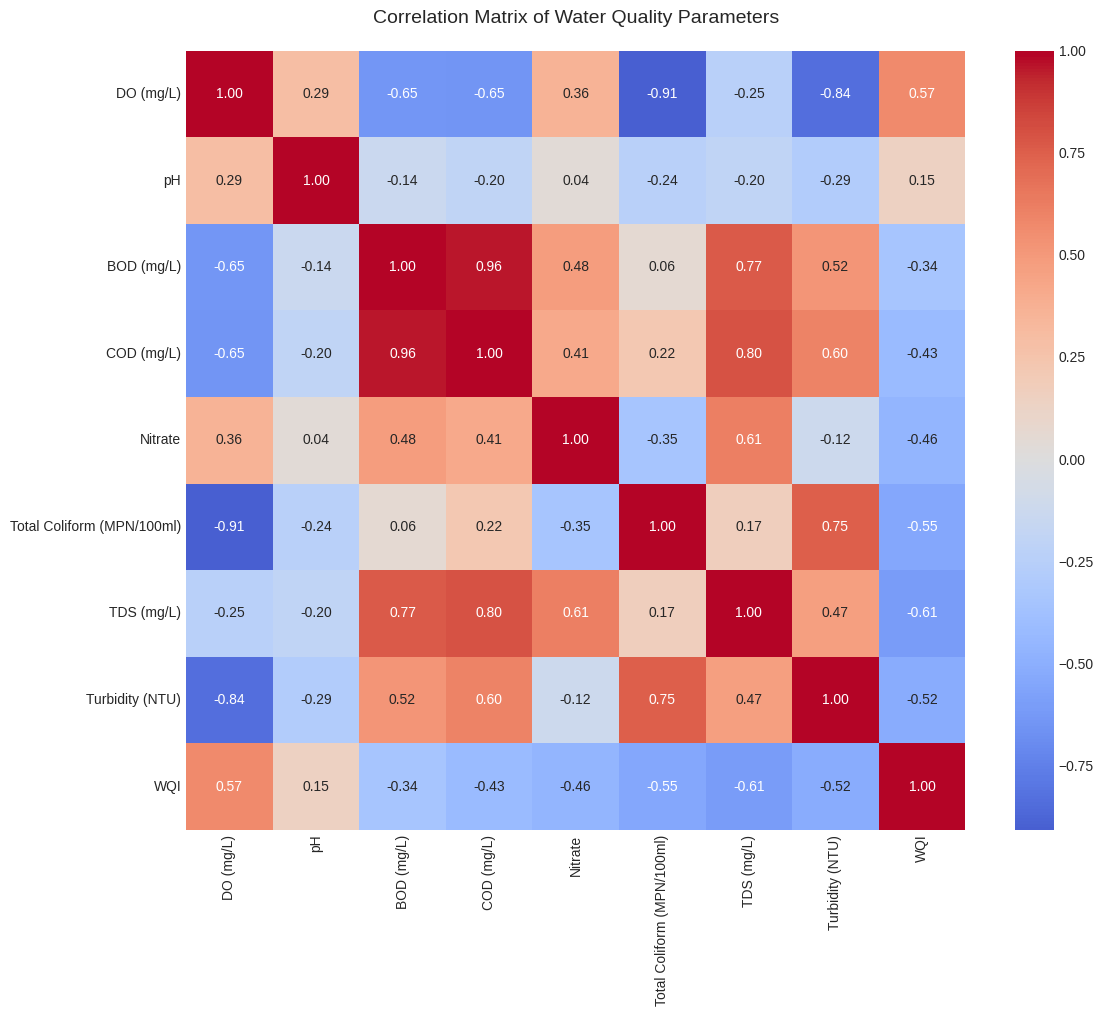

In [13]:
# Correlation matrix
corr_params = ['DO (mg/L)', 'pH', 'BOD (mg/L)', 'COD (mg/L)', 'Nitrate', 
               'Total Coliform (MPN/100ml)', 'TDS (mg/L)', 'Turbidity (NTU)', 'WQI']
corr_params = [p for p in corr_params if p in df_clean.columns]
corr_matrix = df_clean[corr_params].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix of Water Quality Parameters', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

In [14]:
print('=' * 80)
print('TOP 10 MOST POLLUTED LOCATIONS')
print('=' * 80)
polluted = df_clean.nsmallest(10, 'WQI')[['Station name', 'water_bodies', 'WQI', 'Water_Quality_Class']]
print(polluted.to_string(index=False))

print('\n' + '=' * 80)
print('TOP 10 CLEANEST LOCATIONS')
print('=' * 80)
clean = df_clean.nlargest(10, 'WQI')[['Station name', 'water_bodies', 'WQI', 'Water_Quality_Class']]
print(clean.to_string(index=False))

TOP 10 MOST POLLUTED LOCATIONS
          Station name   water_bodies       WQI Water_Quality_Class
           Asani Kunta Lakes  & Tanks 14.330303     Highly Polluted
         Isnapur Tank, Lakes  & Tanks 27.269193     Highly Polluted
   Kistaipally Cheruvu Lakes  & Tanks 27.460058     Highly Polluted
         Mallapur tank Lakes  & Tanks 29.106706     Highly Polluted
Gaddapotharam cheruvu, Lakes  & Tanks 29.166375     Highly Polluted
       Gandigudem Tank Lakes  & Tanks 30.054422     Highly Polluted
        Noor Md. Kunta Lakes  & Tanks 31.222805     Highly Polluted
    Lakadaram Cheruvu, Lakes  & Tanks 31.875996     Highly Polluted
           Sai Cheruvu Lakes  & Tanks 32.447295     Highly Polluted
        Erdanoor Tank, Lakes  & Tanks 33.254098     Highly Polluted

TOP 10 CLEANEST LOCATIONS
                                                             Station name      water_bodies       WQI Water_Quality_Class
                                               River godavari Kaleshwara

## 7. Feature Engineering & ML Preparation

In [15]:
# Prepare features
feature_columns = [col for col in key_parameters if col in df_clean.columns]
X = df_clean[feature_columns].copy()
y_class = df_clean['Water_Quality_Class'].copy()
y_wqi = df_clean['WQI'].copy()

print(f'📊 Features: {len(feature_columns)}')
print(f'📊 Samples: {len(X)}')

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns, index=X.index)

# Encode labels
label_encoder = LabelEncoder()
y_class_encoded = label_encoder.fit_transform(y_class)

print('\nLabel encoding:')
for i, label in enumerate(label_encoder.classes_):
    print(f'  {label}: {i}')

📊 Features: 18
📊 Samples: 165

Label encoding:
  Highly Polluted: 0
  Polluted: 1
  Safe/Potable: 2


In [16]:
# Split data
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_imputed, y_class_encoded, test_size=0.2, random_state=42, stratify=y_class_encoded)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_imputed, y_wqi, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_class_scaled = scaler.fit_transform(X_train_class)
X_test_class_scaled = scaler.transform(X_test_class)
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

print(f'Training samples: {len(X_train_class)}')
print(f'Testing samples: {len(X_test_class)}')

Training samples: 132
Testing samples: 33


## 8. Machine Learning Models
### 8.1 Random Forest Classifier

In [17]:
print('=' * 80)
print('RANDOM FOREST CLASSIFIER')
print('=' * 80)

rf_classifier = RandomForestClassifier(
    n_estimators=200, max_depth=15, min_samples_split=5,
    min_samples_leaf=2, random_state=42, n_jobs=-1)

print('\n🔄 Training...')
rf_classifier.fit(X_train_class_scaled, y_train_class)

y_pred_rf = rf_classifier.predict(X_test_class_scaled)
train_acc_rf = accuracy_score(y_train_class, rf_classifier.predict(X_train_class_scaled))
test_acc_rf = accuracy_score(y_test_class, y_pred_rf)

print(f'\n✅ Training Accuracy: {train_acc_rf:.4f}')
print(f'✅ Testing Accuracy: {test_acc_rf:.4f}')
print('\nClassification Report:')
print(classification_report(y_test_class, y_pred_rf, target_names=label_encoder.classes_))

RANDOM FOREST CLASSIFIER

🔄 Training...



✅ Training Accuracy: 0.9773
✅ Testing Accuracy: 0.9091

Classification Report:
                 precision    recall  f1-score   support

Highly Polluted       0.89      0.89      0.89         9
       Polluted       0.92      0.96      0.94        23
   Safe/Potable       0.00      0.00      0.00         1

       accuracy                           0.91        33
      macro avg       0.60      0.62      0.61        33
   weighted avg       0.88      0.91      0.89        33



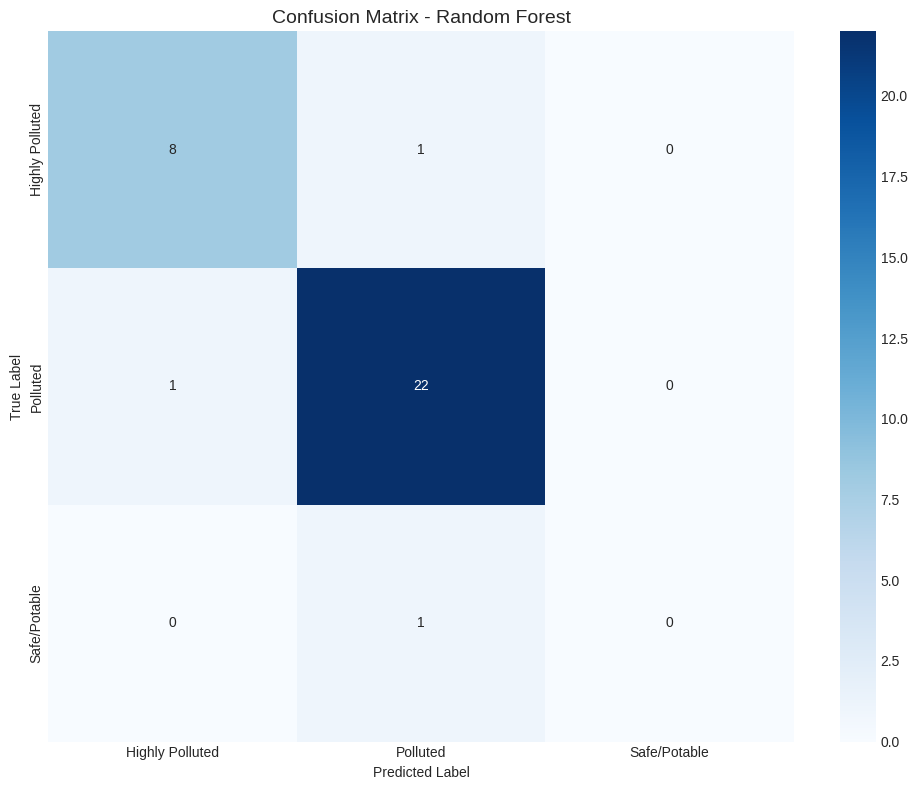

In [18]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test_class, y_pred_rf)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Random Forest', fontsize=14)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

### 8.2 XGBoost Classifier

In [19]:
print('=' * 80)
print('XGBOOST CLASSIFIER')
print('=' * 80)

xgb_classifier = xgb.XGBClassifier(
    n_estimators=200, max_depth=8, learning_rate=0.1,
    subsample=0.8, colsample_bytree=0.8, random_state=42)

print('\n🔄 Training...')
xgb_classifier.fit(X_train_class_scaled, y_train_class)

y_pred_xgb = xgb_classifier.predict(X_test_class_scaled)
train_acc_xgb = accuracy_score(y_train_class, xgb_classifier.predict(X_train_class_scaled))
test_acc_xgb = accuracy_score(y_test_class, y_pred_xgb)

print(f'\n✅ Training Accuracy: {train_acc_xgb:.4f}')
print(f'✅ Testing Accuracy: {test_acc_xgb:.4f}')
print('\nClassification Report:')
print(classification_report(y_test_class, y_pred_xgb, target_names=label_encoder.classes_))

XGBOOST CLASSIFIER

🔄 Training...



✅ Training Accuracy: 1.0000
✅ Testing Accuracy: 0.9394

Classification Report:
                 precision    recall  f1-score   support

Highly Polluted       1.00      0.89      0.94         9
       Polluted       0.92      1.00      0.96        23
   Safe/Potable       0.00      0.00      0.00         1

       accuracy                           0.94        33
      macro avg       0.64      0.63      0.63        33
   weighted avg       0.91      0.94      0.92        33



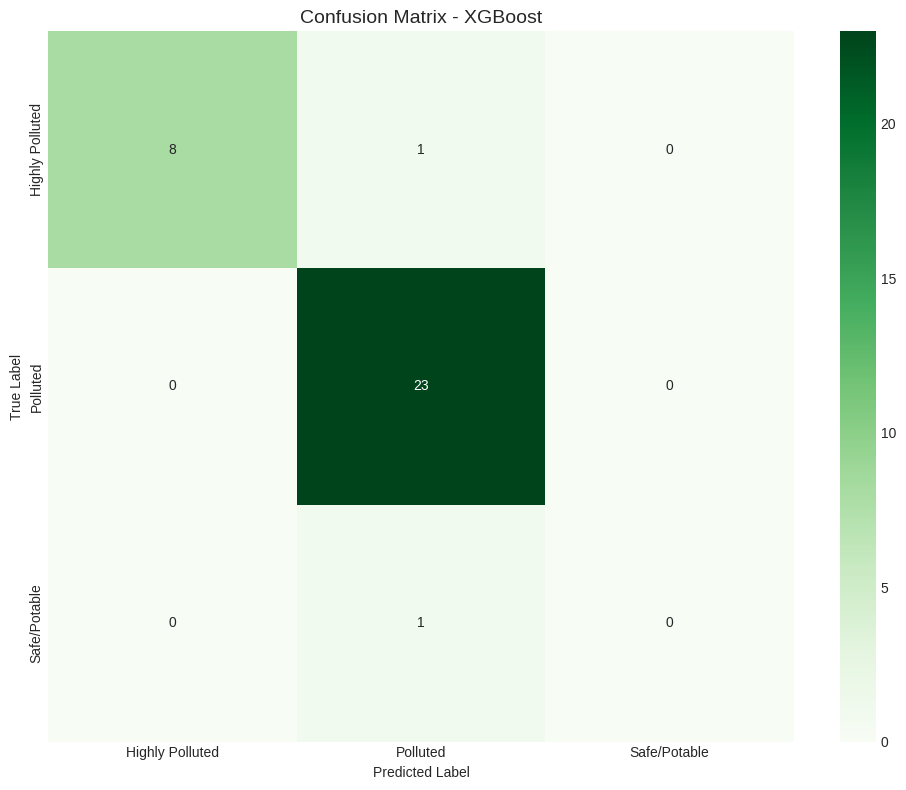

In [20]:
cm_xgb = confusion_matrix(y_test_class, y_pred_xgb)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - XGBoost', fontsize=14)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

### 8.3 Neural Network Classifier

In [21]:
print('=' * 80)
print('NEURAL NETWORK CLASSIFIER')
print('=' * 80)

nn_classifier = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_class_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(len(label_encoder.classes_), activation='softmax')
])

nn_classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
nn_classifier.summary()

NEURAL NETWORK CLASSIFIER


2025-12-03 14:11:27.914032: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,763 (53.76 KB)

 Trainable params: 13,315 (52.01 KB)

 Non-trainable params: 448 (1.75 KB)

In [22]:
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

print('🔄 Training Neural Network...')
history_class = nn_classifier.fit(
    X_train_class_scaled, y_train_class,
    validation_split=0.2, epochs=100, batch_size=32,
    callbacks=[early_stop, reduce_lr], verbose=0)

train_loss, train_acc_nn = nn_classifier.evaluate(X_train_class_scaled, y_train_class, verbose=0)
test_loss, test_acc_nn = nn_classifier.evaluate(X_test_class_scaled, y_test_class, verbose=0)

print(f'\n✅ Training Accuracy: {train_acc_nn:.4f}')
print(f'✅ Testing Accuracy: {test_acc_nn:.4f}')

y_pred_nn = np.argmax(nn_classifier.predict(X_test_class_scaled, verbose=0), axis=1)
print('\nClassification Report:')
print(classification_report(y_test_class, y_pred_nn, target_names=label_encoder.classes_))

🔄 Training Neural Network...



✅ Training Accuracy: 0.9167
✅ Testing Accuracy: 0.9394



Classification Report:
                 precision    recall  f1-score   support

Highly Polluted       1.00      0.89      0.94         9
       Polluted       0.92      1.00      0.96        23
   Safe/Potable       0.00      0.00      0.00         1

       accuracy                           0.94        33
      macro avg       0.64      0.63      0.63        33
   weighted avg       0.91      0.94      0.92        33



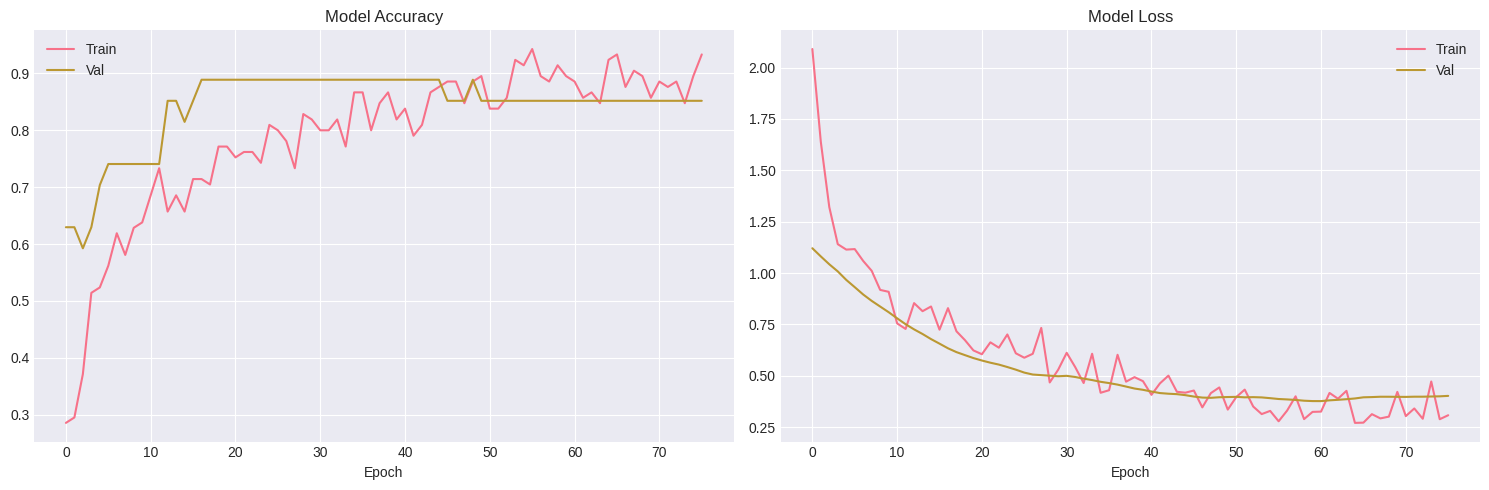

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].plot(history_class.history['accuracy'], label='Train')
axes[0].plot(history_class.history['val_accuracy'], label='Val')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(history_class.history['loss'], label='Train')
axes[1].plot(history_class.history['val_loss'], label='Val')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend()
axes[1].grid(True)
plt.tight_layout()
plt.show()

## 9. Regression Models (WQI Prediction)
### 9.1 Random Forest, XGBoost, Neural Network

In [24]:
# Random Forest Regressor
rf_regressor = RandomForestRegressor(
    n_estimators=200, max_depth=15, min_samples_split=5,
    min_samples_leaf=2, random_state=42, n_jobs=-1)
rf_regressor.fit(X_train_reg_scaled, y_train_reg)
y_pred_rf_reg = rf_regressor.predict(X_test_reg_scaled)
test_r2_rf = r2_score(y_test_reg, y_pred_rf_reg)
test_rmse_rf = np.sqrt(mean_squared_error(y_test_reg, y_pred_rf_reg))

# XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(
    n_estimators=200, max_depth=8, learning_rate=0.1,
    subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb_regressor.fit(X_train_reg_scaled, y_train_reg)
y_pred_xgb_reg = xgb_regressor.predict(X_test_reg_scaled)
test_r2_xgb = r2_score(y_test_reg, y_pred_xgb_reg)
test_rmse_xgb = np.sqrt(mean_squared_error(y_test_reg, y_pred_xgb_reg))

# Neural Network Regressor
nn_regressor = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_reg_scaled.shape[1],)),
    BatchNormalization(), Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(), Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(), Dropout(0.2),
    Dense(1)
])
nn_regressor.compile(optimizer='adam', loss='mse', metrics=['mae'])
nn_regressor.fit(X_train_reg_scaled, y_train_reg, validation_split=0.2,
                 epochs=100, batch_size=32,
                 callbacks=[EarlyStopping(patience=15, restore_best_weights=True)],
                 verbose=0)
y_pred_nn_reg = nn_regressor.predict(X_test_reg_scaled, verbose=0).flatten()
test_r2_nn = r2_score(y_test_reg, y_pred_nn_reg)
test_rmse_nn = np.sqrt(mean_squared_error(y_test_reg, y_pred_nn_reg))

print('Regression Models Performance:')
print(f'Random Forest - R²: {test_r2_rf:.4f}, RMSE: {test_rmse_rf:.4f}')
print(f'XGBoost       - R²: {test_r2_xgb:.4f}, RMSE: {test_rmse_xgb:.4f}')
print(f'Neural Network- R²: {test_r2_nn:.4f}, RMSE: {test_rmse_nn:.4f}')

Regression Models Performance:
Random Forest - R²: 0.9154, RMSE: 3.3670
XGBoost       - R²: 0.9188, RMSE: 3.2988
Neural Network- R²: -11.1070, RMSE: 40.2701


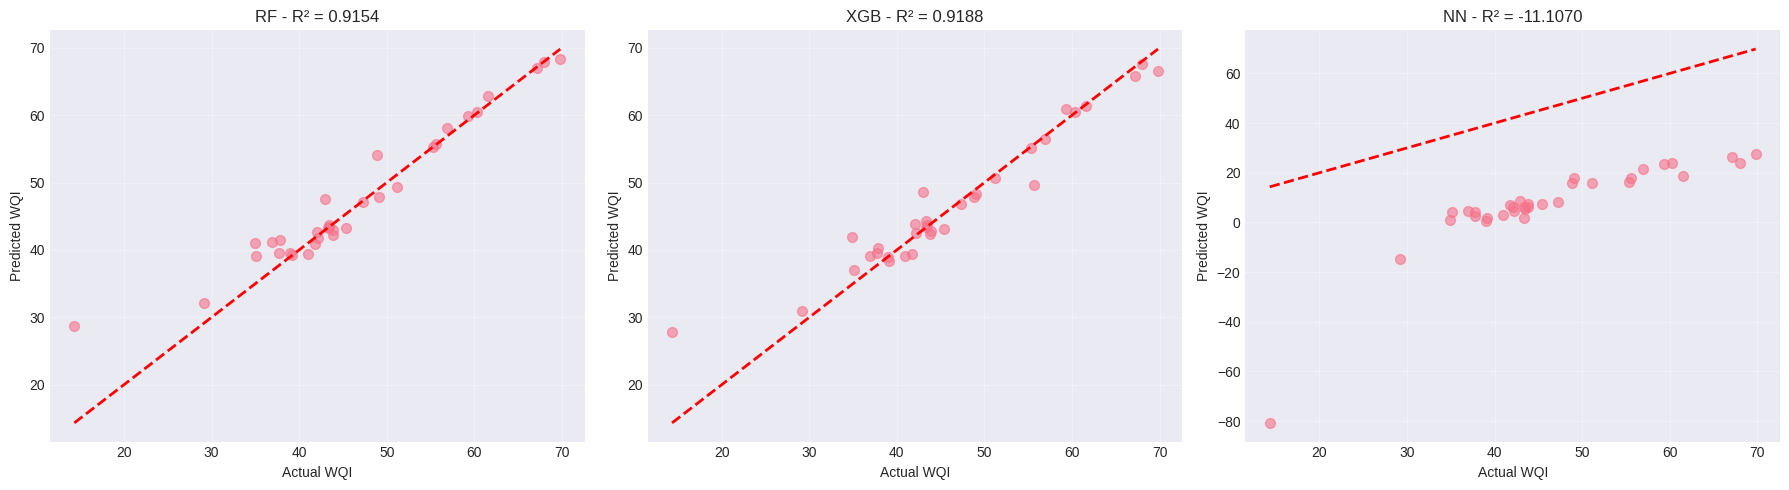

In [25]:
# Actual vs Predicted plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
models_reg = [('RF', y_pred_rf_reg, test_r2_rf),
              ('XGB', y_pred_xgb_reg, test_r2_xgb),
              ('NN', y_pred_nn_reg, test_r2_nn)]

for idx, (name, y_pred, r2) in enumerate(models_reg):
    axes[idx].scatter(y_test_reg, y_pred, alpha=0.6, s=50)
    axes[idx].plot([y_test_reg.min(), y_test_reg.max()],
                   [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
    axes[idx].set_xlabel('Actual WQI')
    axes[idx].set_ylabel('Predicted WQI')
    axes[idx].set_title(f'{name} - R² = {r2:.4f}')
    axes[idx].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 10. Model Comparison & Feature Importance

In [26]:
# Classification comparison
class_results = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'Neural Network'],
    'Testing Accuracy': [test_acc_rf, test_acc_xgb, test_acc_nn]
})

# Regression comparison
reg_results = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'Neural Network'],
    'Testing R²': [test_r2_rf, test_r2_xgb, test_r2_nn],
    'Testing RMSE': [test_rmse_rf, test_rmse_xgb, test_rmse_nn]
})

print('=' * 80)
print('CLASSIFICATION MODELS COMPARISON')
print('=' * 80)
print(class_results.to_string(index=False))

print('\n' + '=' * 80)
print('REGRESSION MODELS COMPARISON')
print('=' * 80)
print(reg_results.to_string(index=False))

CLASSIFICATION MODELS COMPARISON
         Model  Testing Accuracy
 Random Forest          0.909091
       XGBoost          0.939394
Neural Network          0.939394

REGRESSION MODELS COMPARISON
         Model  Testing R²  Testing RMSE
 Random Forest    0.915361      3.367043
       XGBoost    0.918759      3.298766
Neural Network  -11.107030     40.270066


Feature Importance - Random Forest:
                       Feature  Importance
2         Conductivity (mS/cm)    0.184383
12                  TDS (mg/L)    0.145585
7   Fecal Coliform (MPN/100ml)    0.071561
5                      Nitrate    0.069525
11             Chloride (mg/L)    0.065984
16             Hardness (mg/L)    0.053519
4                   COD (mg/L)    0.049415
17             Fluoride (mg/L)    0.048214
10           Total Alk. (mg/L)    0.044800
1                           pH    0.038842
3                   BOD (mg/L)    0.038312
9              Turbidity (NTU)    0.036338
14      Total Phosphate (mg/L)    0.034477
15                     Ammonia    0.032062
8   Total Coliform (MPN/100ml)    0.029488
13                  TSS (mg/L)    0.025476
0                    DO (mg/L)    0.021736
6             Nitrite-N (mg/L)    0.010283


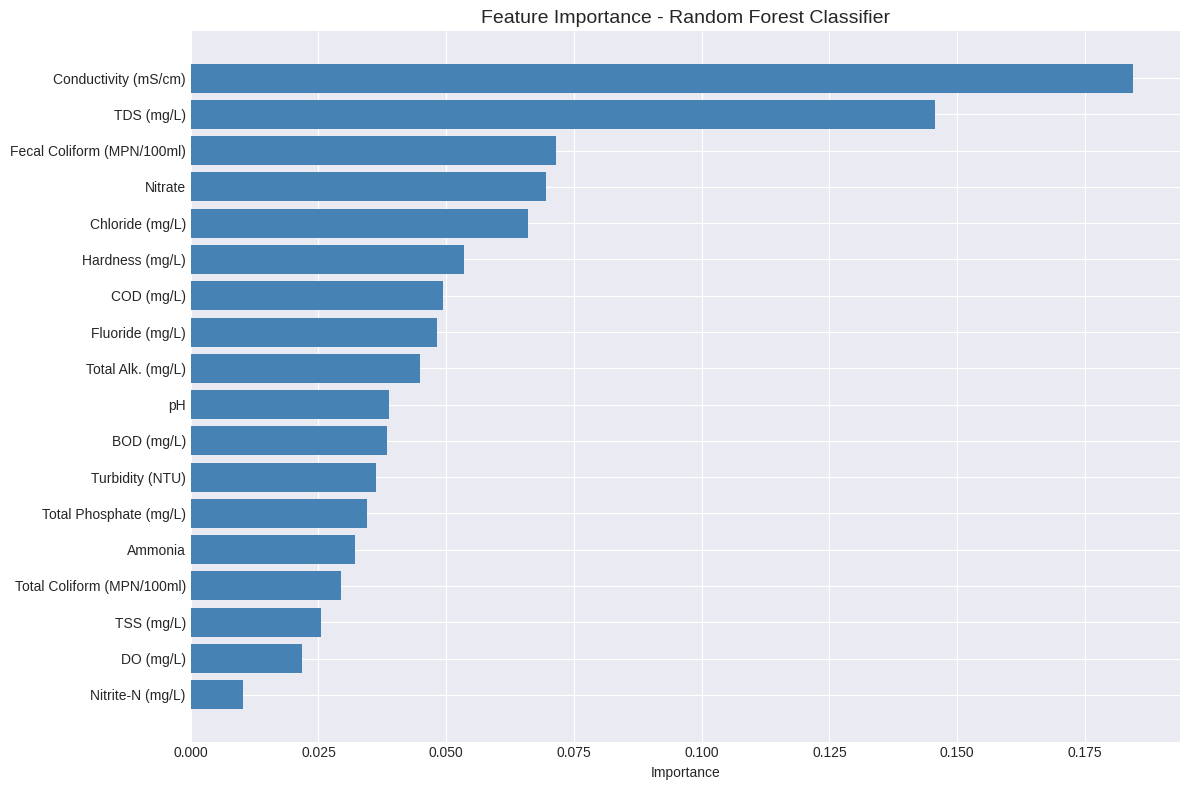

In [27]:
# Feature importance from Random Forest
rf_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_classifier.feature_importances_
}).sort_values('Importance', ascending=False)

print('Feature Importance - Random Forest:')
print(rf_importance)

plt.figure(figsize=(12, 8))
plt.barh(rf_importance['Feature'], rf_importance['Importance'], color='steelblue')
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest Classifier', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

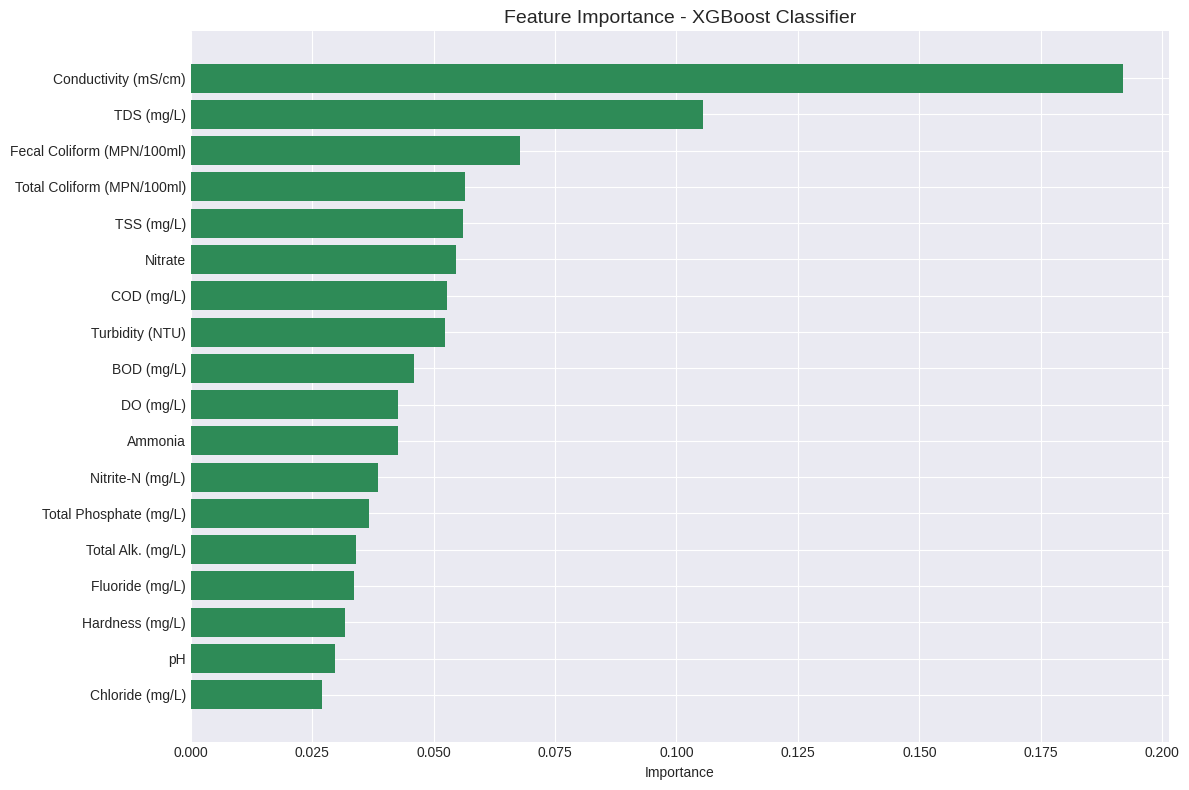

In [28]:
# XGBoost feature importance
xgb_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': xgb_classifier.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(xgb_importance['Feature'], xgb_importance['Importance'], color='seagreen')
plt.xlabel('Importance')
plt.title('Feature Importance - XGBoost Classifier', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 11. Key Insights & Conclusions

In [29]:
best_classifier = class_results.loc[class_results['Testing Accuracy'].idxmax(), 'Model']
best_classifier_acc = class_results['Testing Accuracy'].max()
best_regressor = reg_results.loc[reg_results['Testing R²'].idxmax(), 'Model']
best_regressor_r2 = reg_results['Testing R²'].max()

print('=' * 80)
print('KEY INSIGHTS FROM WATER QUALITY ANALYSIS')
print('=' * 80)
print(f'\n✅ BEST CLASSIFICATION MODEL: {best_classifier} ({best_classifier_acc:.4f} accuracy)')
print(f'✅ BEST REGRESSION MODEL: {best_regressor} ({best_regressor_r2:.4f} R²)')

print(f'\n📊 WATER QUALITY DISTRIBUTION:')
for category, count in df_clean['Water_Quality_Class'].value_counts().items():
    pct = (count / len(df_clean)) * 100
    print(f'   {category}: {count} ({pct:.1f}%)')

print(f'\n🔬 TOP 5 MOST IMPORTANT PARAMETERS:')
for idx, row in rf_importance.head(5).iterrows():
    print(f'   {row["Feature"]}: {row["Importance"]:.4f}')

print('\n' + '=' * 80)
print('RECOMMENDATIONS')
print('=' * 80)
print('''
1. PRIORITY INTERVENTIONS:
   - Focus on highly polluted water bodies (WQI < 40)
   - Monitor key parameters: BOD, COD, Total Coliform
   - Implement treatment systems for lakes and tanks

2. MONITORING:
   - Increase sampling frequency for polluted locations
   - Deploy real-time sensors for critical parameters
   - Establish early warning systems

3. POLICY & REGULATION:
   - Strengthen effluent treatment requirements
   - Regular audits of industrial discharge points
   - Promote water conservation and pollution prevention
''')
print('=' * 80)
print('ANALYSIS COMPLETE ✅')
print('=' * 80)

KEY INSIGHTS FROM WATER QUALITY ANALYSIS

✅ BEST CLASSIFICATION MODEL: XGBoost (0.9394 accuracy)
✅ BEST REGRESSION MODEL: XGBoost (0.9188 R²)

📊 WATER QUALITY DISTRIBUTION:
   Polluted: 118 (71.5%)
   Highly Polluted: 44 (26.7%)
   Safe/Potable: 3 (1.8%)

🔬 TOP 5 MOST IMPORTANT PARAMETERS:
   Conductivity (mS/cm): 0.1844
   TDS (mg/L): 0.1456
   Fecal Coliform (MPN/100ml): 0.0716
   Nitrate: 0.0695
   Chloride (mg/L): 0.0660

RECOMMENDATIONS

1. PRIORITY INTERVENTIONS:
   - Focus on highly polluted water bodies (WQI < 40)
   - Monitor key parameters: BOD, COD, Total Coliform
   - Implement treatment systems for lakes and tanks

2. MONITORING:
   - Increase sampling frequency for polluted locations
   - Deploy real-time sensors for critical parameters
   - Establish early warning systems

3. POLICY & REGULATION:
   - Strengthen effluent treatment requirements
   - Regular audits of industrial discharge points
   - Promote water conservation and pollution prevention

ANALYSIS COMPLETE ✅


## 12. Save Trained Models

In [30]:
import pickle
import os

os.makedirs('models', exist_ok=True)

# Save models
with open('models/rf_classifier.pkl', 'wb') as f:
    pickle.dump(rf_classifier, f)
with open('models/xgb_classifier.pkl', 'wb') as f:
    pickle.dump(xgb_classifier, f)
nn_classifier.save('models/nn_classifier.h5')

with open('models/rf_regressor.pkl', 'wb') as f:
    pickle.dump(rf_regressor, f)
with open('models/xgb_regressor.pkl', 'wb') as f:
    pickle.dump(xgb_regressor, f)
nn_regressor.save('models/nn_regressor.h5')

# Save preprocessors
with open('models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('models/label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)
with open('models/imputer.pkl', 'wb') as f:
    pickle.dump(imputer, f)
with open('models/feature_names.pkl', 'wb') as f:
    pickle.dump(feature_columns, f)

print('🎉 All models saved successfully in models/ directory!')
print('Models can be loaded later for predictions on new water samples.')

🎉 All models saved successfully in models/ directory!
Models can be loaded later for predictions on new water samples.
